In [20]:
from datetime import datetime

import tensorflow as tf
import tensorflow.keras.layers as layers
import numpy as np
import pandas as pd
from chart_studio.utils import numpy
from pandas import DataFrame

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [21]:
X = np.concatenate((x_train, x_test), axis=0)
x_orig = X.copy()
X = X / 255.0
y = np.concatenate((y_train, y_test), axis=0)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)

In [23]:
model = tf.keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(320, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(150, activation='relu'),
    #layers.Dense(50, activation='relu'),
    #layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 320)            │       251,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 150)            │        48,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300,860 (1.15 MB)

 Trainable params: 300,860 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [26]:
epochs=30
batch_size=200
train_stats = model.fit(
    X_train,
    Y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    verbose=1
)

Epoch 1/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7773 - loss: 0.6196 - val_accuracy: 0.8451 - val_loss: 0.4309
Epoch 2/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8417 - loss: 0.4339 - val_accuracy: 0.8635 - val_loss: 0.3820
Epoch 3/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8561 - loss: 0.3956 - val_accuracy: 0.8603 - val_loss: 0.3806
Epoch 4/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8646 - loss: 0.3716 - val_accuracy: 0.8819 - val_loss: 0.3299
Epoch 5/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8690 - loss: 0.3556 - val_accuracy: 0.8803 - val_loss: 0.3305
Epoch 6/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8723 - loss: 0.3480 - val_accuracy: 0.8816 - val_loss: 0.3250
Epoch 7/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.3383 - val_accuracy: 0.8879 - val_loss: 0.3135
Epoch 8/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8794 - loss: 0.3242 - val_accuracy: 0.

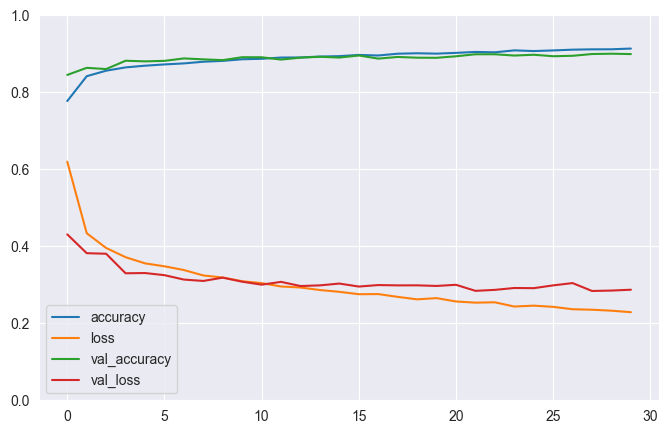

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Dokładność modelu: {accuracy:.2f}")

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8999 - loss: 0.2810
Dokładność modelu: 0.90


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
****************************************************************
probs :  [9.9773324e-01 7.4213023e-12 7.0785347e-04 2.3370338e-05 3.5298774e-06
 2.0133587e-12 1.5319621e-03 6.5185032e-13 4.7775495e-10 7.2933207e-13]
klasa : 0
Nazwa klasy:  T-shirt/top
rzeczywista klasa:  0
Nazwa rzeczywistej klasy:  T-shirt/top


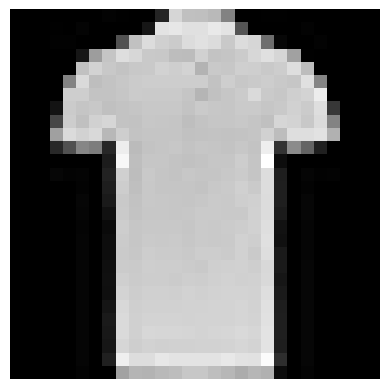

****************************************************************
probs :  [4.1839730e-11 9.5012499e-14 1.4064287e-10 7.4197240e-13 7.0241418e-10
 1.0000000e+00 3.6087782e-11 1.2729615e-08 5.2958632e-10 6.9167914e-12]
klasa : 5
Nazwa klasy:  Sandal
rzeczywista klasa:  5
Nazwa rzeczywistej klasy:  Sandal


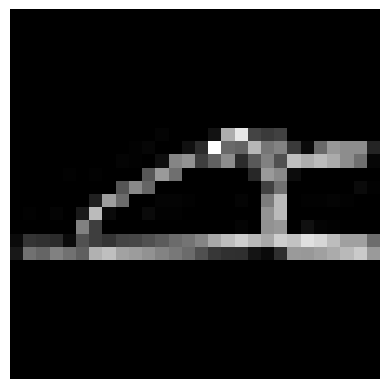

****************************************************************
probs :  [5.2826714e-12 3.0923233e-12 2.7311189e-10 2.6516016e-12 3.7024547e-11
 2.9848192e-07 2.0899149e-11 9.9999964e-01 1.8495262e-10 8.1275395e-08]
klasa : 7
Nazwa klasy:  Sneaker
rzeczywista klasa:  7
Nazwa rzeczywistej klasy:  Sneaker


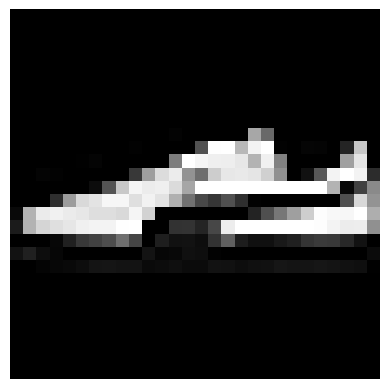

****************************************************************
probs :  [5.0579829e-09 2.8531935e-09 4.7851949e-09 1.3076231e-09 4.6288937e-09
 9.9993563e-01 1.5995654e-09 6.4123124e-05 7.2080539e-08 1.4924287e-07]
klasa : 5
Nazwa klasy:  Sandal
rzeczywista klasa:  5
Nazwa rzeczywistej klasy:  Sandal


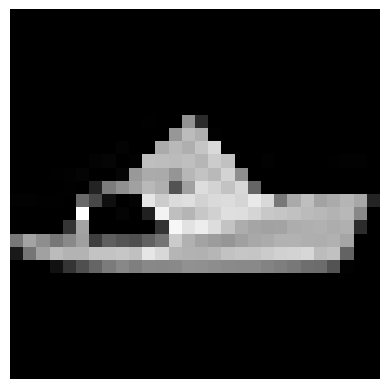

****************************************************************
probs :  [1.8953298e-15 1.0000000e+00 3.0645191e-18 4.1462449e-15 1.9616271e-16
 8.2024451e-28 4.5788081e-15 9.9178772e-29 1.0890149e-23 5.0941463e-26]
klasa : 1
Nazwa klasy:  Trouser
rzeczywista klasa:  1
Nazwa rzeczywistej klasy:  Trouser


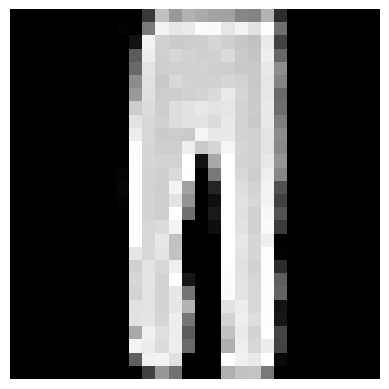

In [29]:
zalando_class = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

def plot_img(img):
    #print(img)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')   # ukrywa osie
    plt.show()

y_pred = model.predict(X_test)
for i in range(5):
    print('*' * 64)
    print("probs : ", y_pred[i])
    print("klasa :", np.argmax(y_pred[i]))
    print("Nazwa klasy: ", zalando_class[np.argmax(y_pred[i])])
    print("rzeczywista klasa: ", Y_test[i])
    print("Nazwa rzeczywistej klasy: ", zalando_class[Y_test[i]])
    plot_img(X_test[i]*256)

In [30]:
import time
#timestamp = system.date.format(system.date.now(), 'YYYY-MM-dd_HH_mm_ss')
name =f"ACC%s-models.keras"%str(accuracy)[0:5].replace('.', '')
model.save(name)
name

'ACC0899-models.keras'

# Augnemtacja

In [4]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import numpy as np
model_load = tf.keras.models.load_model('ACC0906-models.keras')
loss, accuracy = model_load.evaluate(X_test, Y_test)
print(f"Dokładność modelu: {accuracy:.2f}")

D:\ML_AI\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


NameError: name 'X_test' is not defined

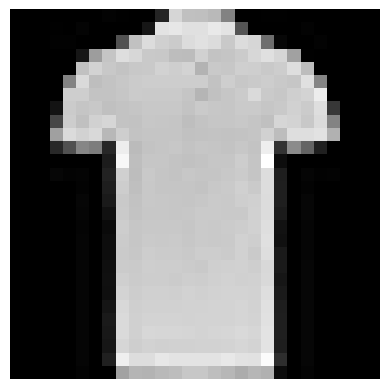

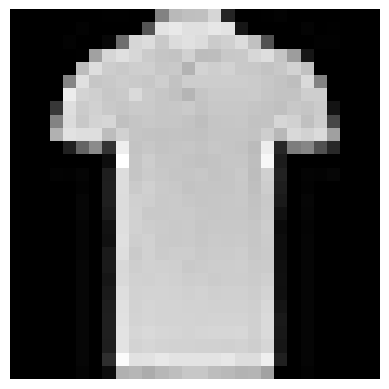

In [32]:
plot_img(X_test[0]*256)
flipped = np.fliplr(X_test[0])
plot_img(flipped*256)

In [77]:
model = tf.keras.Sequential([
  layers.Input(shape=(28,28,1)),

    layers.Conv2D(32, 3, activation='relu'),
    #layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    #layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    #rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True
)
reshp_x_train = X_train.reshape(-1, 28, 28, 1)
reshp_x_test = X_test.reshape(-1, 28, 28, 1)
datagen.fit(reshp_x_train)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [79]:
train_stats = model.fit(
    datagen.flow(reshp_x_train, Y_train, batch_size=200),
    verbose=1,
    epochs=20,
    batch_size=200,
    validation_data=(reshp_x_test, Y_test)
)

Epoch 1/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.8060 - loss: 0.5313 - val_accuracy: 0.8656 - val_loss: 0.3577
Epoch 2/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.8695 - loss: 0.3557 - val_accuracy: 0.8990 - val_loss: 0.2813
Epoch 3/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.8878 - loss: 0.3052 - val_accuracy: 0.9083 - val_loss: 0.2596
Epoch 4/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.8962 - loss: 0.2799 - val_accuracy: 0.9149 - val_loss: 0.2446
Epoch 5/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.9040 - loss: 0.2578 - val_accuracy: 0.9164 - val_loss: 0.2372
Epoch 6/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.9103 - loss: 0.2427 - val_accuracy: 0.9171 - val_loss: 0.2302
Epoch 7/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.9142 - loss: 0.2335 - val_accuracy: 0.9161 - val_loss: 0.2362
Epoch 8/20
315/315 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.9180 - loss: 0.2216 - 

In [80]:
loss, accuracy = model.evaluate(reshp_x_test, Y_test)
print(f"Dokładność modelu: {accuracy:.2f}")

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9341 - loss: 0.2069
Dokładność modelu: 0.93


In [94]:
epochs=30
batch_size=200
train_stats = model.fit(
    reshp_x_train,
    Y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    verbose=1
)

Epoch 1/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.9610 - loss: 0.1043 - val_accuracy: 0.9605 - val_loss: 0.1031
Epoch 2/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.9777 - loss: 0.0634 - val_accuracy: 0.9640 - val_loss: 0.0984
Epoch 3/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.9866 - loss: 0.0396 - val_accuracy: 0.9637 - val_loss: 0.1037
Epoch 4/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.9919 - loss: 0.0252 - val_accuracy: 0.9606 - val_loss: 0.1256
Epoch 5/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.9958 - loss: 0.0150 - val_accuracy: 0.9616 - val_loss: 0.1239
Epoch 6/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9979 - loss: 0.0093 - val_accuracy: 0.9590 - val_loss: 0.1364
Epoch 7/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.9985 - loss: 0.0066 - val_accuracy: 0.9621 - val_loss: 0.1493
Epoch 8/30
284/284 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.9987 - loss: 0.0058 - 

KeyboardInterrupt: 

In [76]:
loss, accuracy = model.evaluate(reshp_x_test, Y_test)
print(f"Dokładność modelu: {accuracy:.2f}")

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9281 - loss: 0.2674
Dokładność modelu: 0.93


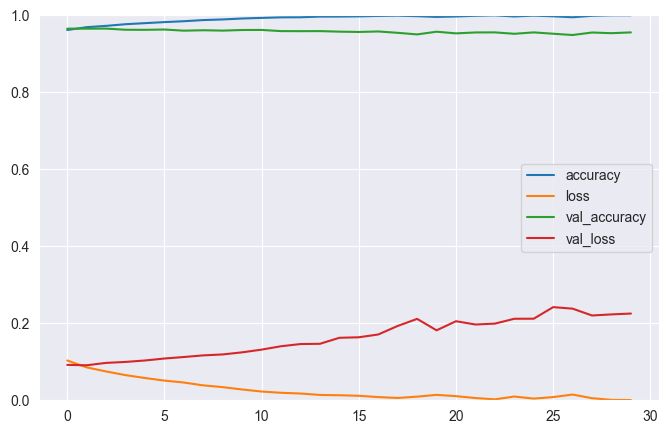

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()